In [155]:
import pandas as pd
import numpy as np

df = pd.read_csv('./SouthKorea100_.csv', encoding='utf-8')
category = list(set(df['카테고리']))
cnt = np.zeros(shape=len(category), dtype=int)
    
def get_cnt(matching: bool = False):
    global cnt

    for (i, data) in df.iterrows():
        c = data['카테고리']
        idx = category.index(c)
        cnt[idx] += 1

    # 비중일 때 주석 해제해주세요 (횟수일때는 주석처리)
    cnt = cnt / len(df) *100

    if not matching:
        return cnt
    else:
        match = {}
        for i in range(len(category)):
            match[category[i]] = cnt[i]
        return match

freq = get_cnt(matching=True)
    
# def main():
#     freq = get_cnt(matching=True)
#     print("Total number of items: {}".format(len(df)))
#     print(freq)

# main()

In [156]:
freq

{'Productivity (Applications)': 3.0,
 'Graphics & Design (Applications)': 1.0,
 'Business (Applications)': 3.0,
 'Travel (Applications)': 5.0,
 'Social Networking (Applications)': 8.0,
 'Utilities (Applications)': 4.0,
 'Games': 12.0,
 'Medical (Applications)': 2.0,
 'Shopping (Applications)': 10.0,
 'Health and Fitness (Applications)': 3.0,
 'Reference (Applications)': 2.0,
 'Navigation (Applications)': 3.0,
 'Food and Drink (Applications)': 8.0,
 'Entertainment (Applications)': 7.000000000000001,
 'Lifestyle (Applications)': 10.0,
 'Finance (Applications)': 10.0,
 'Photo and Video (Applications)': 6.0,
 'News (Applications)': 1.0,
 'Music (Applications)': 2.0}

In [157]:
labels = freq.keys()

In [158]:
values = freq.values()

In [159]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### Pie Chart

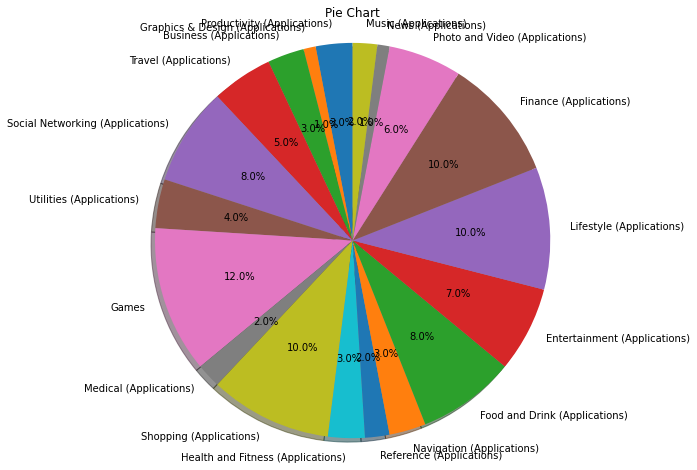

In [160]:
plt.title('Pie Chart')
plt.pie(values, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

### Donut Chart with Subgraphs

In [161]:
# importing library and set figure size

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [162]:
# 전체 values 합에서 Games, Kids의 values를 빼준다.
# or Application의 합만 구한다.

In [163]:
# 카테고리별로 분류
AllCategory = ['Business (Applications)', 'Catalogs (Applications)', 'DeveloperTools (Applications)', 'Education (Applications)', 'Entertainment (Applications)', 'Finance (Applications)', 'Food and Drink (Applications)', 'Graphics & Design (Applications)', 'Health and Fitness (Applications)', 'cnt_Lifestyle (Applications)', 'Magazines and Newspapers (Applications)', 'Medical (Applications)', 'Music (Applications)', 'Navigation (Applications)', 'News (Applications)', 'Photo and Video (Applications)', 'Productivity (Applications)', 'Reference (Applications)', 'Shopping (Applications)', 'Business (Applications)', 'Social Networking (Applications)', 'Sports (Applications)', 'Travel (Applications)', 'Utilities (Applications)', 'Weather (Applications)', 'Games', 'Kids']
Life = ['Finance (Applications)', 'Food and Drink (Applications)', 'Health and Fitness  (Applications)',' Lifestyle (Applications)', 'Weather (Applications)', 'Medical (Applications)', 'Navigation (Applications)']
Leisure = ['Entertainment (Applications)', 'Shopping (Applications)', 'Social Networking (Applications)', 'Sports (Applications)', 'Travel (Applications)', 'Music (Applications)', 'Photo and Video (Applications)']
Work = ['Business (Applications)', 'Developer Tools (Applications)', 'Graphics & Design (Applications)', 'Productivity (Applications)']
Edu = ['Books (Applications)', 'Catalogs (Applications)', 'Education (Applications)', 'Reference (Applications)',' Magazines and Newspapers (Applications)', 'News (Applications)', 'Utilities (Applications)']

In [164]:
# 카테고리별 합 구하기
# Life = float(freq.get('Finance (Applications)')) + float(freq.get('Food and Drink (Applications)')) + float(freq.get('Health and Fitness (Applications)')) + float(freq.get('Lifestyle (Applications)')) + float(freq.get('Weather (Applications)')) + float(freq.get('Medical (Applications)')) + float(freq.get('Navigation (Applications)'))
# Leisure = float(freq.get('Entertainment (Applications)')) + float(freq.get('Shopping (Applications)')) + float(freq.get('Social Networking (Applications)')) + float(freq.get('Sports (Applications)')) + float(freq.get('Travel (Applications)')) + float(freq.get('Music (Applications)')) + float(freq.get('Photo and Video (Applications)'))
# Work = float(freq.get('Business (Applications)')) + float(freq.get('Developer Tools (Applications)')) + float(freq.get('Graphics & Design (Applications)')) + float(freq.get('Productivity (Applications)'))
# Edu = float(freq.get('Books (Applications)')) + float(freq.get('Catalogs (Applications)')) + float(freq.get('Education (Applications)')) + float(freq.get('Reference (Applications)')) + float(freq.get('Magazines and Newspapers (Applications)')) + float(freq.get('News (Applications)')) + float(freq.get('Utilities (Applications)'))

In [165]:
# None 값 처리
# Life = list(filter(None, freq.get('Life')))
# Leisure = list(filter(None, freq.get('Leisure')))
# Work = list(filter(None, freq.get('Work')))
# Edu = list(filter(None, freq.get('Edu')))

In [166]:
if freq.get('Games') == None:
    Games = 0
    Kids = float(freq.get('Kids'))
    Application = 100-Games-Kids
elif freq.get('Kids') == None:
    Games = float(freq.get('Games'))
    Kids = 0
    Application = 100-Games-Kids
else:
    Games = float(freq.get('Games'))
    Kids = float(freq.get('Kids'))
    Application = 100-Games-Kids

In [167]:
 # info. of groups
    
group_names = ['Application', 'Games', 'Kids']
group_sizes = [Application, Games, Kids]

# info. of subgroups
subgroup_names = ['Life', 'Leisure', 'Work', 'Edu', 'Games', 'Kids']
subgroup_sizes = [10, 20, 20, 15, Games, Kids]

# colors
a, b, c = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]

# width
width_num = 0.4

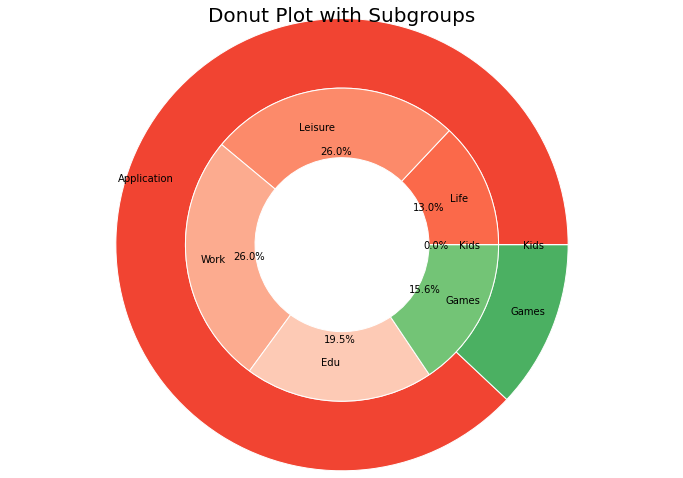

In [168]:
# Outside Ring

fig, ax = plt.subplots()
ax.axis('equal')
pie_outside, _ = ax.pie(group_sizes, 
                        radius=1.3, 
                        labels=group_names, 
                        labeldistance=0.8,
                        colors=[a(0.6), b(0.6), c(0.6)])

plt.setp(pie_outside, 
         width=width_num, 
         edgecolor='white')

# Inside Ring

pie_inside, plt_labels, junk = \
    ax.pie(subgroup_sizes, 
           radius=(1.3 - width_num), 
           labels=subgroup_names, 
           labeldistance=0.75, 
           autopct='%1.1f%%', 
           colors=[a(0.5), a(0.4), a(0.3), a(0.2), 
                   b(0.5), 
                   c(0.5)])

plt.setp(pie_inside, 
         width=width_num, 
         edgecolor='white')

plt.title('Donut Plot with Subgroups', fontsize=20)
plt.show()

### Bar Chart

ConversionError: Failed to convert value(s) to axis units: dict_keys(['Productivity (Applications)', 'Graphics & Design (Applications)', 'Business (Applications)', 'Travel (Applications)', 'Social Networking (Applications)', 'Utilities (Applications)', 'Games', 'Medical (Applications)', 'Shopping (Applications)', 'Health and Fitness (Applications)', 'Reference (Applications)', 'Navigation (Applications)', 'Food and Drink (Applications)', 'Entertainment (Applications)', 'Lifestyle (Applications)', 'Finance (Applications)', 'Photo and Video (Applications)', 'News (Applications)', 'Music (Applications)'])

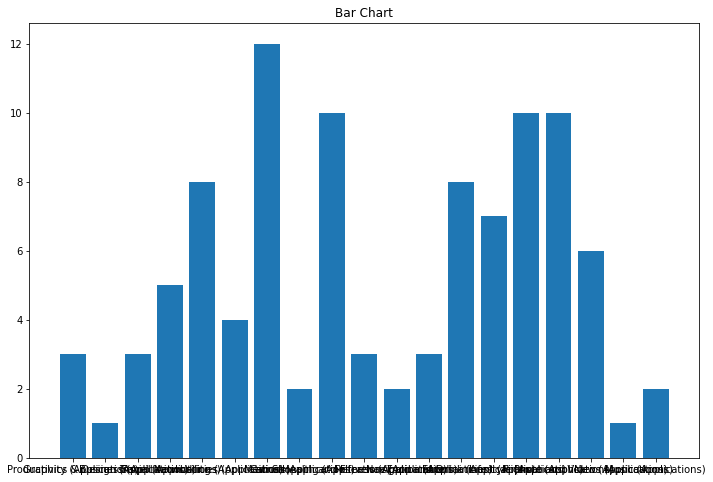

In [169]:
y = values
x = labels
xlabel = str(labels)
plt.title("Bar Chart")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.xlabel('Application')
plt.ylabel('Frequency')
plt.show()

### Word Cloud

https://frhyme.github.io/python-lib/wordcloud/

In [ ]:
# !pip install wordcloud

In [170]:
from wordcloud import WordCloud
text = str(df['카테고리'])

In [171]:
text.strip()

'0               Medical (Applications)\n1                                Games\n2     Social Networking (Applications)\n3        Food and Drink (Applications)\n4        Food and Drink (Applications)\n                    ...               \n95             Business (Applications)\n96              Finance (Applications)\n97    Social Networking (Applications)\n98            Utilities (Applications)\n99                               Games\nName: 카테고리, Length: 100, dtype: object'

In [172]:
wordcloud = WordCloud(max_font_size=100).generate(text)

In [173]:
fig = plt.figure()

<Figure size 864x576 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

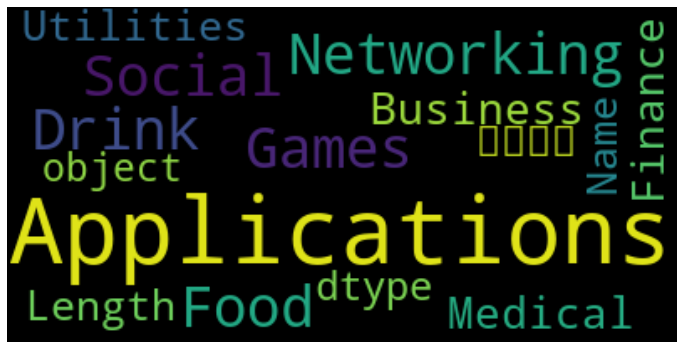

In [174]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')